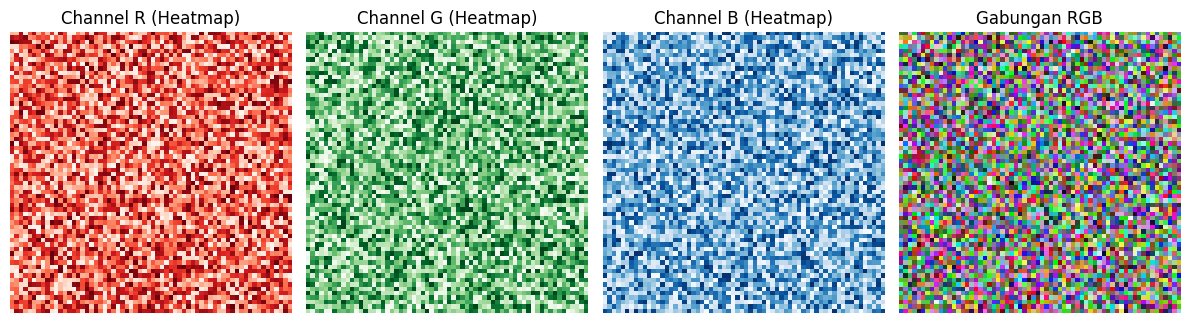

In [3]:
import torch
import matplotlib.pyplot as plt

# Buat tensor random seperti hasil generator: [3, 64, 64]
img = torch.rand(3, 64, 64)

# Pisahkan channel
R = img[0]
G = img[1]
B = img[2]

# Konversi ke bentuk gambar RGB: [64, 64, 3]
rgb_img = img.permute(1, 2, 0).numpy()

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.title("Channel R (Heatmap)")
plt.imshow(R, cmap='Reds')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Channel G (Heatmap)")
plt.imshow(G, cmap='Greens')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Channel B (Heatmap)")
plt.imshow(B, cmap='Blues')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Gabungan RGB")
plt.imshow(rgb_img)
plt.axis('off')

plt.tight_layout()
plt.show()


Shape tensor: torch.Size([512, 4, 4])


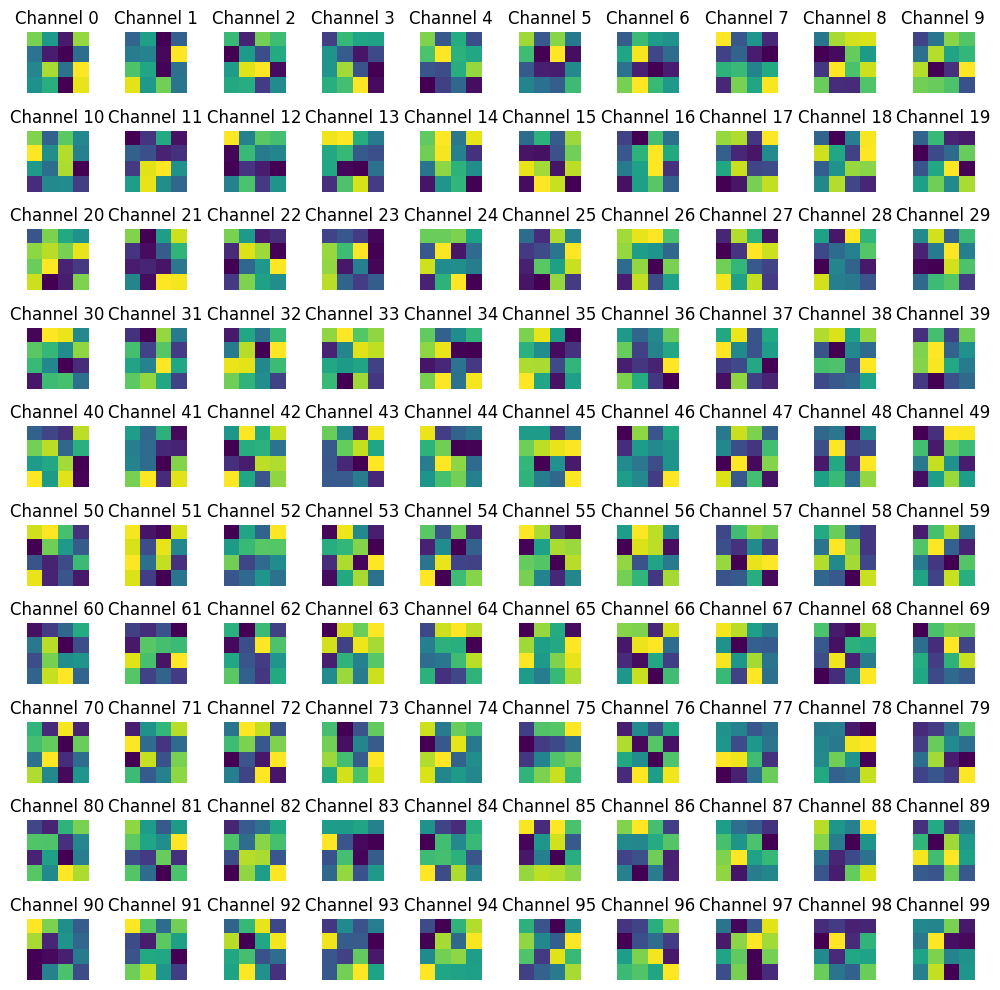

In [4]:
import torch
import matplotlib.pyplot as plt

# Buat tensor random dengan 512 channel
# Misal resolusi 4x4 seperti layer awal generator DCGAN
features = torch.rand(512, 4, 4)

print("Shape tensor:", features.shape)
# Hasil: torch.Size([512, 4, 4])

# Tampilkan 16 channel pertama sebagai heatmap
plt.figure(figsize=(10, 10))

for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(features[i], cmap='viridis')   # visualisasi heatmap
    plt.title(f'Channel {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
print(features)


tensor([[[0.6976, 0.5393, 0.2507, 0.7228],
         [0.4404, 0.2531, 0.2106, 0.4293],
         [0.4897, 0.7431, 0.4392, 0.8198],
         [0.5147, 0.5904, 0.2074, 0.7982]],

        [[0.3551, 0.5403, 0.1010, 0.3407],
         [0.4310, 0.4511, 0.1172, 0.8809],
         [0.6622, 0.5627, 0.1075, 0.3938],
         [0.8494, 0.5220, 0.7146, 0.4031]],

        [[0.7037, 0.2265, 0.7945, 0.7130],
         [0.1474, 0.5947, 0.3459, 0.6496],
         [0.6006, 0.9293, 0.9680, 0.1712],
         [0.6440, 0.6590, 0.2927, 0.5432]],

        ...,

        [[0.9708, 0.1402, 0.4445, 0.1704],
         [0.5951, 0.9751, 0.5321, 0.8933],
         [0.1306, 0.5442, 0.6482, 0.0342],
         [0.9915, 0.1963, 0.6744, 0.7128]],

        [[0.5328, 0.3195, 0.1935, 0.0671],
         [0.0599, 0.4593, 0.9006, 0.1887],
         [0.8130, 0.2983, 0.2538, 0.3008],
         [0.9810, 0.0379, 0.7610, 0.7374]],

        [[0.9035, 0.0667, 0.4975, 0.7774],
         [0.6037, 0.2027, 0.5386, 0.8595],
         [0.7744, 0.7260, 0.74

Skor mentah:
 tensor([[-0.4883,  0.3361, -1.1583,  0.7534,  0.6104],
        [ 0.3436, -0.0050, -1.6552, -0.9902,  0.8546],
        [ 0.6153, -0.4039,  0.3051, -0.4408,  0.1630],
        [ 0.5117, -0.2513,  2.1252, -0.5950, -1.5412],
        [ 0.9299, -0.7772,  1.7403, -0.5813, -0.3368]])

Bobot attention (softmax):
 tensor([[0.0975, 0.2224, 0.0499, 0.3376, 0.2926],
        [0.2651, 0.1871, 0.0359, 0.0699, 0.4420],
        [0.3249, 0.1172, 0.2382, 0.1130, 0.2067],
        [0.1440, 0.0671, 0.7228, 0.0476, 0.0185],
        [0.2543, 0.0461, 0.5718, 0.0561, 0.0717]])

Output konteks:
 tensor([[ 0.6099, -0.1060,  0.3116,  0.4430],
        [ 0.9061,  0.5942,  0.6174,  0.7997],
        [ 1.1197,  0.3138,  0.7152,  0.9897],
        [ 1.5244, -0.6909,  0.5044,  0.7186],
        [ 1.4116, -0.2794,  0.6599,  0.9397]])


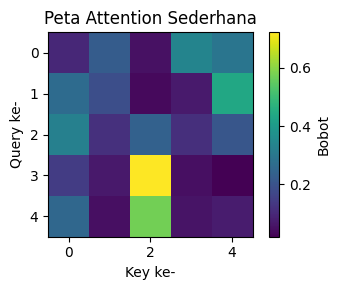

In [6]:
# Contoh sederhana scaled dot-product attention
import math
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)

seq_len = 5  # panjang urutan (jumlah token)
d_model = 4  # dimensi embedding sederhana

Q = torch.randn(seq_len, d_model)
K = torch.randn(seq_len, d_model)
V = torch.randn(seq_len, d_model)

scores = (Q @ K.T) / math.sqrt(d_model)  # QK^T / sqrt(d_k)
attn_weights = scores.softmax(dim=-1)    # softmax per baris (per query)
context = attn_weights @ V               # hasil gabungan

print("Skor mentah:\n", scores)
print("\nBobot attention (softmax):\n", attn_weights)
print("\nOutput konteks:\n", context)

plt.figure(figsize=(4, 3))
plt.imshow(attn_weights.detach(), cmap='viridis')
plt.colorbar(label='Bobot')
plt.xlabel('Key ke-')
plt.ylabel('Query ke-')
plt.title('Peta Attention Sederhana')
plt.tight_layout()
plt.show()


2025-12-10 07:57:11.710705: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Kalimat Input: Kucing itu duduk di atas karpet
Tokens Input: ['Kucing', 'itu', 'duduk', 'di', 'atas', 'karpet']

Kalimat Target: The cat sits on the mat
Tokens Target: ['The', 'cat', 'sits', 'on', 'the', 'mat']


I0000 00:00:1765328236.477958    1573 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6



Shape embedding input: (1, 6, 64)
Shape embedding target: (1, 6, 64)

SELF-ATTENTION PADA KALIMAT INPUT
Input shape: (1, 6, 64)
Output shape: (1, 6, 64)
Attention weights shape: (1, 4, 6, 6)

CROSS-ATTENTION (TARGET -> INPUT)
Query (target) shape: (1, 6, 64)
Key/Value (input) shape: (1, 6, 64)
Output shape: (1, 6, 64)
Attention weights shape: (1, 4, 6, 6)


/tmp/ipykernel_1573/2601433701.py:182: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


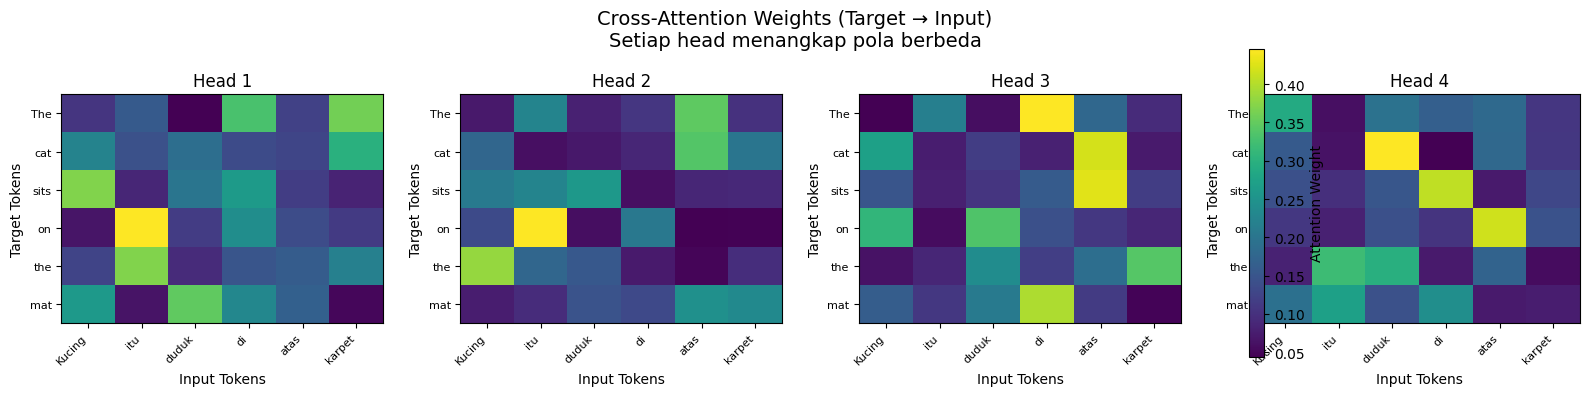


PENJELASAN MEKANISME ATTENTION

1. QUERY (Q): "Apa yang saya cari?"
   - Representasi dari posisi yang ingin mengumpulkan informasi
   
2. KEY (K): "Apa yang saya tawarkan?"
   - Representasi dari posisi yang menyediakan informasi
   
3. VALUE (V): "Informasi apa yang saya miliki?"
   - Konten aktual yang akan ditransfer

4. ATTENTION FORMULA:
   Attention(Q, K, V) = softmax(QK^T / √d_k) × V
   
   - QK^T: Menghitung kesamaan antara query dan semua keys
   - √d_k: Scaling untuk stabilitas gradient
   - softmax: Mengubah scores menjadi probabilitas
   - × V: Weighted sum dari values

5. MULTI-HEAD ATTENTION:
   - Membagi Q, K, V ke beberapa "heads"
   - Setiap head belajar pola attention berbeda
   - Hasil dari semua heads digabungkan di akhir


CONTOH PERHITUNGAN ATTENTION

Token target: 'The'
Perhatian terhadap setiap token input:
  'Kucing': 0.0765 ███
  'itu': 0.1345 ██████
  'duduk': 0.0086 
  'di': 0.3269 ████████████████
  'atas': 0.0950 ████
  'karpet': 0.3585 █████████████████

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# IMPLEMENTASI MEKANISME ATTENTION DENGAN TENSORFLOW
# =============================================================================

# Contoh kalimat untuk demonstrasi
kalimat_input = "Kucing itu duduk di atas karpet"
kalimat_target = "The cat sits on the mat"

# Tokenisasi sederhana (split by space)
tokens_input = kalimat_input.split()
tokens_target = kalimat_target.split()

print(f"Kalimat Input: {kalimat_input}")
print(f"Tokens Input: {tokens_input}")
print(f"\nKalimat Target: {kalimat_target}")
print(f"Tokens Target: {tokens_target}")

# Parameter
d_model = 64  # Dimensi embedding
seq_len_input = len(tokens_input)
seq_len_target = len(tokens_target)

# Simulasi embedding (dalam praktik, gunakan Embedding layer)
np.random.seed(42)
embeddings_input = tf.constant(np.random.randn(1, seq_len_input, d_model), dtype=tf.float32)
embeddings_target = tf.constant(np.random.randn(1, seq_len_target, d_model), dtype=tf.float32)

print(f"\nShape embedding input: {embeddings_input.shape}")
print(f"Shape embedding target: {embeddings_target.shape}")

# =============================================================================
# SCALED DOT-PRODUCT ATTENTION
# =============================================================================

def scaled_dot_product_attention(query, key, value, mask=None):
    """
    Menghitung attention weights dan output.
    
    Args:
        query: Query tensor dengan shape (..., seq_len_q, d_k)
        key: Key tensor dengan shape (..., seq_len_k, d_k)
        value: Value tensor dengan shape (..., seq_len_v, d_v)
        mask: Optional mask tensor
    
    Returns:
        output: Hasil attention
        attention_weights: Bobot attention
    """
    # Hitung matmul antara Q dan K^T
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    
    # Scaling
    d_k = tf.cast(tf.shape(key)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(d_k)
    
    # Terapkan mask jika ada
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)
    
    # Softmax untuk mendapatkan weights
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    
    # Kalikan dengan Values
    output = tf.matmul(attention_weights, value)
    
    return output, attention_weights

# =============================================================================
# MULTI-HEAD ATTENTION
# =============================================================================

class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        self.depth = d_model // self.num_heads
        
        # Dense layers untuk Q, K, V
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        
        # Output dense layer
        self.dense = tf.keras.layers.Dense(d_model)
    
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth)."""
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]
        
        # Linear projections
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        
        # Split heads
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        
        # Scaled dot-product attention
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        
        # Concat heads
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        
        # Final linear projection
        output = self.dense(concat_attention)
        
        return output, attention_weights

# =============================================================================
# DEMONSTRASI
# =============================================================================

# Buat instance Multi-Head Attention
num_heads = 4
mha = MultiHeadAttention(d_model, num_heads)

# Jalankan attention (self-attention pada input)
# Query, Key, dan Value semuanya dari input yang sama untuk self-attention
output_self, attention_weights_self = mha(
    embeddings_input, embeddings_input, embeddings_input
)

print("\n" + "="*60)
print("SELF-ATTENTION PADA KALIMAT INPUT")
print("="*60)
print(f"Input shape: {embeddings_input.shape}")
print(f"Output shape: {output_self.shape}")
print(f"Attention weights shape: {attention_weights_self.shape}")

# Cross-attention (target memperhatikan input)
output_cross, attention_weights_cross = mha(
    embeddings_input, embeddings_input, embeddings_target
)

print("\n" + "="*60)
print("CROSS-ATTENTION (TARGET -> INPUT)")
print("="*60)
print(f"Query (target) shape: {embeddings_target.shape}")
print(f"Key/Value (input) shape: {embeddings_input.shape}")
print(f"Output shape: {output_cross.shape}")
print(f"Attention weights shape: {attention_weights_cross.shape}")

# =============================================================================
# VISUALISASI ATTENTION WEIGHTS
# =============================================================================

fig, axes = plt.subplots(1, num_heads, figsize=(16, 4))
fig.suptitle('Cross-Attention Weights (Target → Input)\nSetiap head menangkap pola berbeda', fontsize=14)

for i in range(num_heads):
    ax = axes[i]
    # Ambil attention weights untuk head ke-i
    attn = attention_weights_cross[0, i, :, :].numpy()
    
    im = ax.imshow(attn, cmap='viridis', aspect='auto')
    ax.set_title(f'Head {i+1}')
    ax.set_xlabel('Input Tokens')
    ax.set_ylabel('Target Tokens')
    
    # Set tick labels
    ax.set_xticks(range(len(tokens_input)))
    ax.set_xticklabels(tokens_input, rotation=45, ha='right', fontsize=8)
    ax.set_yticks(range(len(tokens_target)))
    ax.set_yticklabels(tokens_target, fontsize=8)

plt.colorbar(im, ax=axes, label='Attention Weight')
plt.tight_layout()
plt.show()

# =============================================================================
# PENJELASAN MEKANISME ATTENTION
# =============================================================================

print("\n" + "="*60)
print("PENJELASAN MEKANISME ATTENTION")
print("="*60)
print("""
1. QUERY (Q): "Apa yang saya cari?"
   - Representasi dari posisi yang ingin mengumpulkan informasi
   
2. KEY (K): "Apa yang saya tawarkan?"
   - Representasi dari posisi yang menyediakan informasi
   
3. VALUE (V): "Informasi apa yang saya miliki?"
   - Konten aktual yang akan ditransfer

4. ATTENTION FORMULA:
   Attention(Q, K, V) = softmax(QK^T / √d_k) × V
   
   - QK^T: Menghitung kesamaan antara query dan semua keys
   - √d_k: Scaling untuk stabilitas gradient
   - softmax: Mengubah scores menjadi probabilitas
   - × V: Weighted sum dari values

5. MULTI-HEAD ATTENTION:
   - Membagi Q, K, V ke beberapa "heads"
   - Setiap head belajar pola attention berbeda
   - Hasil dari semua heads digabungkan di akhir
""")

# Contoh perhitungan attention sederhana untuk satu token
print("\n" + "="*60)
print("CONTOH PERHITUNGAN ATTENTION")
print("="*60)

# Ambil attention weights untuk target token pertama "The"
attn_example = attention_weights_cross[0, 0, 0, :].numpy()
print(f"\nToken target: '{tokens_target[0]}'")
print(f"Perhatian terhadap setiap token input:")
for i, (token, weight) in enumerate(zip(tokens_input, attn_example)):
    bar = "█" * int(weight * 50)
    print(f"  '{token}': {weight:.4f} {bar}")
